In [1]:
import random
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Tim hieu data

Cap-shape (Hình dạng mũ nấm):

    b = bell (hình chuông)
    c = conical (hình nón)
    x = convex (hình lồi)
    f = flat (hình phẳng)
    k = knobbed (hình núm)
    s = sunken (hình lõm)

Cap-surface (Bề mặt mũ nấm):

    f = fibrous (sợi)
    g = grooves (rãnh)
    y = scaly (vảy)
    s = smooth (mịn)

Cap-color (Màu sắc mũ nấm):

    n = brown (nâu)
    b = buff (vàng nhạt)
    c = cinnamon (nâu quế)
    g = gray (xám)
    r = green (xanh lá)
    p = pink (hồng)
    u = purple (tím)
    e = red (đỏ)
    w = white (trắng)
    y = yellow (vàng)

Bruises (Bầm dập):

    t = bruises (bầm dập)
    f = no bruises (không bầm dập)

Odor (Mùi):

    a = almond (hạnh nhân)
    l = anise (hồi)
    c = creosote (hóa chất)
    y = fishy (mùi cá)
    f = foul (mùi hôi)
    m = musty (mùi mốc)
    n = none (không có mùi)
    p = pungent (mùi nồng)
    s = spicy (mùi cay)

Gill-attachment (Cách thức dính của mang nấm):

    a = attached (dính vào thân)
    d = descending (xuống thấp)
    f = free (tự do, không dính)
    n = notched (có rãnh)

Gill-spacing (Khoảng cách giữa các mang nấm):

    c = close (khít)
    w = crowded (chen chúc)
    d = distant (xa)

Gill-size (Kích thước của mang nấm):

    b = broad (rộng)
    n = narrow (hẹp)

Gill-color (Màu sắc của mang nấm):

    Các màu tương tự như "cap-color", như nâu (n), trắng (w), hồng (p), tím (u), vàng (y), xanh (r), v.v.

Stalk-shape (Hình dạng thân nấm):

    e = enlarging (phình ra)
    t = tapering (thu nhỏ lại)

Stalk-root (Rễ thân nấm):

    b = bulbous (hình củ hành)
    c = club (hình chày)
    u = cup (hình chén)
    e = equal (đều)
    z = rhizomorphs (có rễ)
    r = rooted (có rễ)
    ? = missing (không xác định)

Stalk-surface-above-ring (Bề mặt thân nấm trên vòng):

    f = fibrous (sợi)
    y = scaly (vảy)
    k = silky (mượt mà)
    s = smooth (mịn)

Stalk-surface-below-ring (Bề mặt thân nấm dưới vòng):

    Các tùy chọn tương tự như "stalk-surface-above-ring".

Stalk-color-above-ring (Màu sắc thân nấm trên vòng):

    Các màu tương tự như "cap-color".

Stalk-color-below-ring (Màu sắc thân nấm dưới vòng):

    Các màu tương tự như "cap-color".

Veil-type (Loại vỏ nấm):

    p = partial (vỏ bao quanh một phần, chỉ bao phủ nấm khi còn non)
    u = universal (vỏ bao phủ toàn bộ)

Veil-color (Màu sắc vỏ nấm):

    n = brown (nâu)
    o = orange (cam)
    w = white (trắng)
    y = yellow (vàng)

Ring-number (Số lượng vòng trên thân nấm):

    n = none (không có vòng)
    o = one (một vòng)
    t = two (hai vòng)

Ring-type (Loại vòng trên thân nấm):

    c = cobwebby (giống mạng nhện)
    e = evanescent (mất đi)
    f = flaring (mở rộng)
    l = large (lớn)
    n = none (không có vòng)
    p = pendant (treo)
    s = sheathing (bao phủ)
    z = zone (vòng theo lớp)

Spore-print-color (Màu sắc bản in bào tử):

    Các màu sắc tương tự như những đặc điểm trên, ví dụ: đen (k), nâu (n), trắng (w), vàng (y), cam (o), v.v.

Population (Số lượng nấm trong khu vực):

    a = abundant (phổ biến, nhiều)
    c = clustered (nhóm lại)
    n = numerous (nhiều)
    s = scattered (rải rác)
    v = several (một vài)
    y = solitary (đơn độc)

Habitat (Môi trường sống):

    g = grasses (cỏ)
    l = leaves (lá)
    m = meadows (đồng cỏ)
    p = paths (đường mòn)
    u = urban (đô thị)
    w = waste (đất hoang)
    d = woods (rừng)

In [4]:
df['class'].head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [5]:
df['cap-shape'].head()

0    x
1    x
2    b
3    x
4    x
Name: cap-shape, dtype: object

In [6]:
df['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [7]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
def exam(df):
    for idx, col in enumerate(df.columns):
        print(idx)
exam(df)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


# Trực quan hóa đặc trưng data

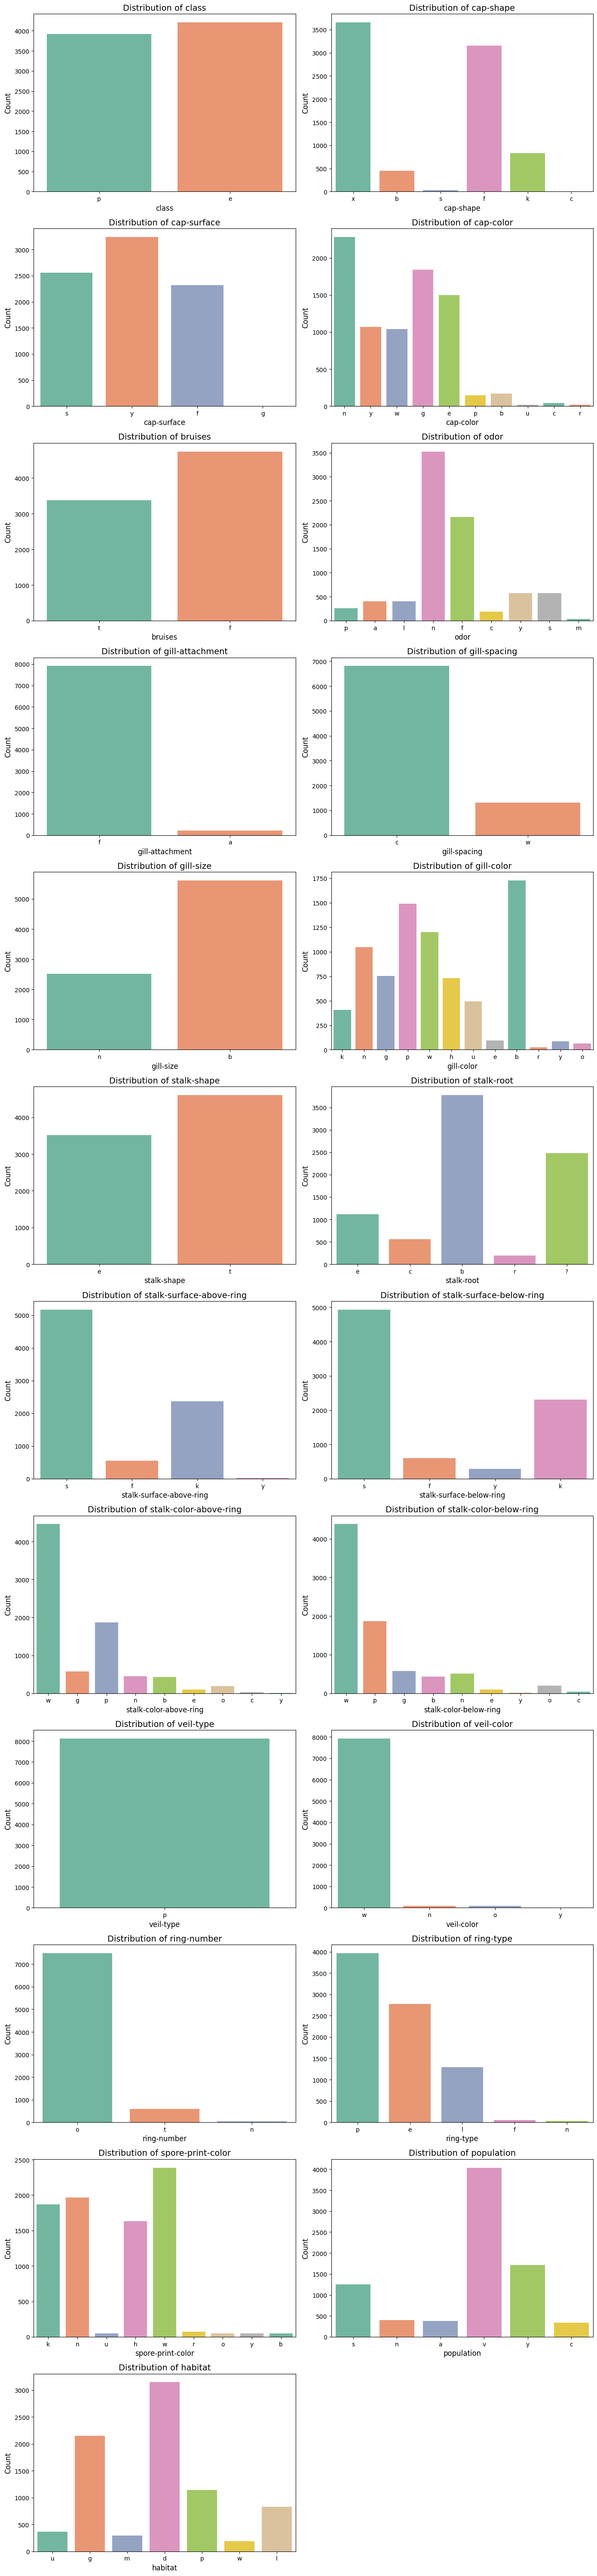

In [9]:
def plot_all_columns(df):
    # Thiết lập số lượng cột và hàng
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)  # Số hàng cần thiết, chia cho 2 cột mỗi hàng

    # Duyệt qua tất cả các cột
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5 * num_rows))  # 2 cột mỗi hàng
    axes = axes.flatten()  # Biến axes thành mảng một chiều để dễ dàng truy cập

    for idx, col in enumerate(df.columns):
        ax = axes[idx]  # Chọn trục con tương ứng với cột

        # Kiểm tra loại dữ liệu của cột
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Nếu là cột phân loại, vẽ biểu đồ cột
            sns.countplot(x=df[col], palette='Set2', ax=ax)
            ax.set_title(f'Distribution of {col}', fontsize=14)
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Count', fontsize=12)
        else:
            # Nếu là cột số học, vẽ histogram
            sns.histplot(df[col], kde=True, color='skyblue', ax=ax)
            ax.set_title(f'Distribution of {col}', fontsize=14)
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Frequency', fontsize=12)

    if num_cols % 2 != 0:
        axes[-1].axis('off')

    plt.tight_layout()
    plt.show()
plot_all_columns(df)

# Mã hóa phân chia tập data model traning  

In [10]:
encoder = OneHotEncoder(drop='first', sparse=False) 

In [11]:
y = df['class']

In [12]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [13]:
df = df.drop('class', axis=1)

In [14]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [15]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [16]:
cols = df.columns.values
for col in cols:
    df[col] = le.fit_transform(df[col])
y = le.fit_transform(y)

In [17]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [18]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
df = ohe.fit_transform(df).toarray()

In [20]:
df

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(df)

In [22]:
x_train

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [23]:
y_train = y

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.30, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size = 0.50, random_state = 42)

# Mô hình GA(Genetic Algorithm) thông qua bài toán tìm trọng số model tốt nhất

###  1. Khởi tạo quần thể 
###  2. Duyệt qua các thế hệ 
###  3. Chọn lọc 
###  4. Lai ghép và đột biến 
###  5. Lặp lại 

In [25]:
# Các hàm kích hoạt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [26]:
def relu(x):
    return np.maximum(0, x)

In [27]:
# Hàm tính forward pass
def forward(x, w, activation):
    return activation(np.matmul(x, w))

In [28]:
# Hàm tính độ chính xác
def acc_fn(y, y_hat):
    return np.mean(y == y_hat)

In [29]:
# Hàm dự đoán
def predict(x, y_hat, weights, activation):
    predictions = np.zeros(shape=(x.shape[0]))
    for idx in range(x.shape[0]):
        r1 = x[idx, :]
        for curr_weights in weights:
            r1 = forward(r1, curr_weights, activation)
        predictions[idx] = np.where(r1 == np.max(r1))[0][0]
    
    accuracy = acc_fn(y_hat, predictions)
    return accuracy, predictions

In [30]:
# Hàm tính fitness
def fitness(x, y_hat, weights, activation):
    accuracies = np.empty(shape=(weights.shape[0]))
    for idx in range(weights.shape[0]):
        accuracies[idx], _ = predict(x, y_hat, weights[idx, :], activation)
    return accuracies

In [31]:
# Chuyển từ ma trận trọng số thành vector
def matrix_to_vector(matrix_weights):
    weights_vector = []
    for idx in range(matrix_weights.shape[0]):
        curr_vector = []
        for layer_idx in range(matrix_weights.shape[1]):
            vector_weights = np.reshape(matrix_weights[idx, layer_idx], newshape=(matrix_weights[idx, layer_idx].size))
            curr_vector.extend(vector_weights)
        weights_vector.append(curr_vector)
    return np.array(weights_vector)

In [32]:
# Hàm tạo mating pool
def mating_pool(pop, fitness, num_parents):
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.argmax(fitness)
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -np.inf  # Set fitness to a very low value so it isn't selected again
    return parents

In [33]:
# Hàm crossover
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint32(offspring_size[1] / 2)

    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    
    return offspring

In [34]:
# Hàm mutation
def mutation(offspring_crossover, mutation_percent):
    num_mutations = np.uint32(mutation_percent * offspring_crossover.shape[1])
    mutation_indices = np.random.randint(0, offspring_crossover.shape[1], num_mutations)

    for idx in range(offspring_crossover.shape[0]):
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indices] += random_value
    return offspring_crossover

In [35]:
def vector_to_matrix(vector_weights, mat_pop_weights):
    mat_weights = []
    for idx in range(mat_pop_weights.shape[0]):
        start = 0
        end = 0
        # Tạo ma trận cho từng cá thể
        individual_weights = []
        for layer_idx in range(mat_pop_weights.shape[1]):
            end = end + mat_pop_weights[idx, layer_idx].size
            curr_vector = vector_weights[idx, start:end]
            mat_layer_weights = np.reshape(curr_vector, newshape=mat_pop_weights[idx, layer_idx].shape)
            individual_weights.append(mat_layer_weights)
            start = end
        mat_weights.append(individual_weights)
    
    # Trả về ma trận có dạng đồng nhất (không phải list của list)
    return np.array(mat_weights, dtype=object)

In [36]:
x_train.shape

(5686, 117)

In [38]:
# Các tham số
solution_per_population = 8
num_parents_mating = 4
num_generations = 100
mutation_percent = 0.20

input_shape = x_train.shape[1]  # Số lượng đặc trưng đầu vào
output_shape = len(np.unique(y_train))  # Số lớp đầu ra

# Khởi tạo trọng số
initial_weights = []
for curr_sol in range(solution_per_population):
    w1 = np.random.uniform(low=-0.1, high=0.1, size=(input_shape, 128))
    w2 = np.random.uniform(low=-0.1, high=0.1, size=(128, 64))
    w3 = np.random.uniform(low=-0.1, high=0.1, size=(64, output_shape))
    initial_weights.append([w1, w2, w3])

weights_mat = np.array(initial_weights, dtype=object)
weights_vector = matrix_to_vector(weights_mat)

# Mảng lưu trữ độ chính xác
accuracies = np.empty(num_generations)

# Huấn luyện
for generation in tqdm(range(num_generations)):
    # Chuyển vector trở lại thành ma trận
    weights_mat = vector_to_matrix(weights_vector, weights_mat)

    # Fitness của dân số
    fit = fitness(x_train, y_train, weights_mat, activation=sigmoid)
    
    # Lưu độ chính xác của thế hệ hiện tại
    accuracies[generation] = np.max(fit)

    # Chọn các bậc phụ huynh từ mating pool
    parents = mating_pool(weights_vector, fit.copy(), num_parents_mating)

    # Tạo thế hệ con thông qua crossover
    offspring_crossover = crossover(parents, offspring_size=(weights_vector.shape[0] - parents.shape[0], weights_vector.shape[1]))

    # Thực hiện đột biến
    offspring_mutation = mutation(offspring_crossover, mutation_percent=mutation_percent)

    # Cập nhật dân số mới
    weights_vector[0:parents.shape[0], :] = parents
    weights_vector[parents.shape[0]:, :] = offspring_mutation

100%|██████████| 100/100 [10:24<00:00,  6.24s/it]


In [39]:
# Chọn trọng số tốt nhất và kiểm tra độ chính xác
weights_mat = vector_to_matrix(weights_vector, weights_mat)
best_weights = weights_mat[0, :]
acc, predictions = predict(x_train, y_train, best_weights, sigmoid)
print("Accuracy of the best solution is : ", acc)

Accuracy of the best solution is :  0.8330988392543088


# Kết quả sau khi thực hiện GA điều chỉnh trọng số 

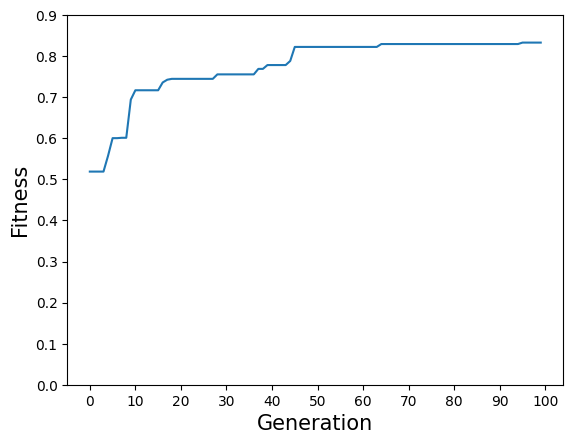

In [40]:
# Vẽ đồ thị độ chính xác qua các thế hệ
plt.plot(accuracies)
plt.xlabel("Generation", fontsize=15)
plt.ylabel("Fitness", fontsize=15)
plt.xticks(np.arange(0, num_generations + 1, 10))
plt.yticks(np.arange(0, 1, 0.1))
plt.show()
